# Exploring Job Market Trends in Armenia








##Introduction

### Problem Statement
Armenia’s job market is widely believed to be dominated by IT and engineering careers. However, real data suggests a different reality: the majority of open positions today are in non-technical fields such as Customer Support, Sales, HR, and Administration.

At the same time, many students and job seekers continue to focus their expectations on tech roles, while employers struggle to fill essential non-technical positions. This creates a growing mismatch between labor market supply and demand.

Despite this situation, it remains unclear which job categories are truly in highest demand, what experience levels companies need most, and how many roles offer flexible or remote work options. Without real data, job seekers cannot make informed career decisions, and educational programs cannot align skills with market needs.

### Goal
This project aims to analyze job postings from [job.am](https://job.am/en/jobs) to discover:
- The Most In-Demand Job Categories: To discover which job categories currently offer the most vacancies.
- The Experience Level Distribution: To determine the distribution of required experience levels across all postings, specifically targeting Junior, Mid-level, and Senior roles.
- The Work Flexibility Availability: To investigate the availability of flexible arrangements, such as remote or part-time work options, within the job market.


## Data Collection (Web Scraping)

In this section, we collect job market data from [job.am](https://job.am/en/jobs). First, we access the main job listings pages and extract key information such as job title, company, location, salary, and job URL. Then, for each job, we visit its individual page to gather additional details like employment type, required work experience, industry, work format and number of employees of each company. All extracted information is stored in a single structured dataset.

In [ ]:
from google.colab import drive
import os
import requests #sends HTTP request and access the data
from bs4 import BeautifulSoup #parses HTML content and extracts information from web
import pandas as pd #for dataframes
import numpy as np #for numerical operations and arrays

In [ ]:
#this is for keeping the whole process(scrapped data, cleaned data, etc) in files in our drive folder
drive.mount('/content/drive')
base_folder = '/content/drive/MyDrive/APL_IMA'

#In case the folder does not exist or is not found
if not os.path.exists(base_folder):
  os.makedirs(base_folder)

# General data files
raw_data = f"{base_folder}/job_am_raw_data.csv"
cleaned_data = f"{base_folder}/job_am_cleaned_data.csv"
preprocessed_data = f"{base_folder}/job_am_preprocessed_data.csv"

Mounted at /content/drive


In [ ]:
def job_scrapping(page_num):
  url = f"https://job.am/en/jobs?p={page_num}"
  print(url)
  jobs_data = []

  response = requests.get(url)
  if response.status_code != 200: # to check if page loaded successfully
      print("Failed to load a page ")

  soup = BeautifulSoup(response.content, "html.parser")
  jobs = soup.find_all("div", class_="jobs-card d-md-none d-block jobs-card-mob")

  for job in jobs:
    title_tag = job.find("a", class_="job-titlelink")
    job_url = "https://job.am" + title_tag['href'] if title_tag and title_tag.get('href') else None

    job_dict = {
      'title': title_tag.text.strip() if title_tag else None,
      'company': job.find("span", class_="company wordBreak").text.strip() if job.find("span", class_="company wordBreak") else None,
      'location': job.find("span", attrs={"data-original-title": "City"}).text.strip() if job.find("span", attrs={"data-original-title": "City"}) else None,
      'salary': job.find("span", attrs={"data-original-title": "Salary"}).text.strip() if job.find("span", attrs={"data-original-title": "Salary"}) else None,
      'job_url': job_url
      }

    jobs_data.append(job_dict)

  return jobs_data

In [ ]:
def job_details_scrapping(job_url):
  response = requests.get(job_url)
  if response.status_code != 200:
      print("Failed to load a page ")

  soup = BeautifulSoup(response.content, "html.parser")
  details = {}


  info_sections = soup.find_all("div", class_="info-address")

  for section in info_sections:
      label_span = section.find("span", class_=False)
      if not label_span:
            continue

      # the span name are presented, for example in this formate "Employemet type:", so I standardised them
      label = label_span.text.strip().lower().replace(":", "")

      value_span = section.find("span", class_="txt-bold")
      if not value_span:
          continue

      value = value_span.text.strip()

      if "employment type" in label:
          details['employment_type'] = value
      elif "work experience" in label:
          details['work_experience'] = value
      elif "industry" in label:
          details['industry'] = value
      elif "work format" in label:
          details['work_format'] = value


  if 'number_of_employees' not in details:
        # Look for any div containing "Number of employees" text
      for div in soup.find_all("div", class_="input-title-name"):
          if "number of employees" in div.text.lower():
              value_div = div.find_next_sibling("div", class_="text-black")
              if value_div:
                  details['number_of_employees'] = value_div.text.strip()
                  break

  return details

In [ ]:
all_jobs = []
page_num = 10

for page in range(1, page_num + 1):
    jobs_on_page = job_scrapping(page)
    all_jobs.extend(jobs_on_page)

for job in all_jobs:
    if job['job_url']:
        details = job_details_scrapping(job['job_url'])
        job.update(details)

df = pd.DataFrame(all_jobs)
df.to_csv(raw_data, index=False)
df



https://job.am/en/jobs?p=1
https://job.am/en/jobs?p=2
https://job.am/en/jobs?p=3
https://job.am/en/jobs?p=4
https://job.am/en/jobs?p=5
https://job.am/en/jobs?p=6
https://job.am/en/jobs?p=7
https://job.am/en/jobs?p=8
https://job.am/en/jobs?p=9
https://job.am/en/jobs?p=10


,title,company,location,salary,job_url,employment_type,work_experience,industry,number_of_employees
0,Հաշվապահ /դեբիտորական պարտքերի վերահսկման ուղղ...,ԱՌԳԵ Բիզնես ՍՊԸ,Yerevan,None,https://job.am/en/job/hashvapah-debitorakan-pa...,Full Time,Senior,"Procurment, Import, Export",151-500
1,Մաքրուհի,Մարտուն Անանյան ՍՊԸ,Yerevan,"100,000֏",https://job.am/en/job/maqruhi-69115,Full Time,Mid level,"Sales, Business Development",1-15
2,Արտագնա Փորձառու Տուր Մենեջեր,Trans Tour,Yerevan,"200,000֏ - 300,000֏",https://job.am/en/job/artagna-pordzaru-tur-men...,Full Time,Senior,"Tourism, Hospitality",NaN
3,էլոկտրական սարքավորումներ վերանորոգող,ԱՐՍՍՈՒՍ ԳՐՈՒՊ ՍՊԸ,Ashtarak,None,https://job.am/en/job/eloktrakan-sarqavorumner...,Full Time,Mid level,"Engineering, Architecture, Construction",51-150
4,Հաշվապահ / Արտադրության Հաշվապահ,Էյ Էմ Գրուպ,Yerevan,None,https://job.am/en/job/hashvapah-artadrutyan-ha...,Full Time,Mid level,"Accounting, Audit",51-150
...,...,...,...,...,...,...,...,...,...
1595,Ադմինիստրատիվ օգնական (IT ընկերությունում),HR solutions Armenia LLC,Yerevan,None,https://job.am/en/job/administrativ-ognakan-it...,Full Time,"Junior, Mid level","Administrative, Clerical",1-15
1596,Օպերատոր,ՌՕՄԱՐԻ ՍՊԸ,Yerevan,"200,000֏ +",https://job.am/en/job/operator-68447,Full Time,"Mid level, Senior","Administrative, Clerical, Customer Support, Cl...",1-15
1597,Վաճառողուհի,Laki Dessert,Yerevan,None,https://job.am/en/job/vacharoghuhi-66799,Part Time,NaN,"Sales, Business Development, Customer Support,...",1-15
1598,Սպասուհի (հյուրանոցային համալիրում),Ակվատեկ համալիր,Yerevan,None,https://job.am/en/job/spasuhi-hyuranocayin-ham...,Full Time,Mid level,"Manual Labor, Sanitation",1-15


This process results in a complete and organized dataset of job postings, combining both general and detailed information. It provides a strong foundation for subsequent cleaning, preprocessing, and analysis, allowing us to explore trends in job categories, experience levels, and work arrangements in the Armenian labor market. The data file is [here.](https://drive.google.com/file/d/1NFLr9NZa-YzzcN78fTy14FovWxrox-H1/view?usp=sharing)

## Data Cleaning

In this section, we clean and standardize the raw dataset to make it ready for further preprocessing. We remove duplicates and missing values in key columns and strip unnecessary whitespace from text columns.

We also remove all tech-related industry jobs to focus on non-technical positions. Titles and company names are formatted consistently with proper capitalization. This ensures a clean and consistent dataset without irrelevant entries or inconsistencies.

In [ ]:
from pandas.core.frame import DataFrame
# Reading data
df = pd.read_csv(raw_data)

# Checking missing values before cleaning in each column
print("Missing values BEFORE cleaning:")
print(df.isnull().sum())

# Removing the rows where salary data is missing
df = df.dropna(subset=['salary', 'work_experience', 'number_of_employees'])

# Checking missing values before cleaning in each column
print("Missing values AFTER cleaning:")
print(df.isnull().sum())

# Removing duplicates and whitespaces
df.drop_duplicates(inplace=True)
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# Removing all tech-related industry jobs
tech_industries = [
    'information technology', 'it', 'software', 'technology',
    'computer', 'internet', 'telecommunications', 'telecom',
    'web development', 'mobile development', 'app development',
    'data', 'artificial intelligence', 'ai', 'machine learning',
    'cybersecurity', 'security', 'cloud', 'saas', 'fintech',
    'digital', 'e-commerce', 'startup', 'tech', 'programming',
    'engineering']

def is_tech_industry(industry):
    if pd.isna(industry):
        return False

    industries = [ind.strip().lower() for ind in str(industry).split(',')]

    for ind in industries:
      if any(keyword in industries for keyword in tech_industries):
        return True

    return False

print("\nRemoving all the tech-related industry jobs:")
print(f"before_filter \t {len(df)}")
df = df[~df['industry'].apply(is_tech_industry)]
print(f"after_filter \t {len(df)}")

# Cleaning the employment type, if there are two or more options setting the dominant one
df['employment_type'] = (
    df['employment_type']
    .astype(str)
    .str.lower()
    .str.replace('-', ' ', regex=True)
    .str.strip()
)

df['employment_type'] = df['employment_type'].replace({
    "full time": "Full Time",
    "part time": "Part Time",
    "remote": "Remote",
    "flexible": "Flexible",
    "not specified": "Not Specified",
    "full time, flexible" : "Full Time",
})


# Standardizing format
df['title'] = df['title'].astype(str).str.title()
df['company'] = df['company'].astype(str).str.title()
df['number_of_employees'] = df['number_of_employees'].astype(str).str.strip()

# Final step: dropping leftover missing values and saving cleaned dataset
df.dropna(inplace=True)
df.to_csv(cleaned_data, index=False)

df


Missing values BEFORE cleaning:
title                     0
company                   0
location                  0
salary                 1004
job_url                   0
employment_type           0
work_experience         104
industry                  0
number_of_employees     172
dtype: int64
Missing values AFTER cleaning:
title                  0
company                0
location               0
salary                 0
job_url                0
employment_type        0
work_experience        0
industry               0
number_of_employees    0
dtype: int64

Removing all the tech-related industry jobs:
before_filter 	 240
after_filter 	 231


,title,company,location,salary,job_url,employment_type,work_experience,industry,number_of_employees
1,Մաքրուհի,Մարտուն Անանյան Սպը,Yerevan,"100,000֏",https://job.am/en/job/maqruhi-69115,Full Time,Mid level,"Sales, Business Development",1-15
7,Գրաֆիկ Դիզայներ,Սիթի Սպը,Yerevan,"100,000֏ - 200,000֏",https://job.am/en/job/grafik-dizayner-69109,contract,Mid level,"Art, Design",1-15
8,Օպերատոր-Դեղագործ,Ֆարմպրոեկտ Սպը,Yerevan,"250,000֏ +",https://job.am/en/job/operator-deghagorc-66231,Full Time,Senior,"Administrative, Clerical, Medical, Health",16-50
12,Product / Project Sales Manager,"""Gss"" Ինժեներական Ընկերություն",Yerevan,"300,000֏ - 500,000֏",https://job.am/en/job/product-project-sales-ma...,Full Time,"Mid level, Senior","Sales, Business Development, Project, Product ...",1-15
15,Մուտքագրող-Օպերատոր,Մարտուն Անանյան Սպը,Yerevan,"150,000֏",https://job.am/en/job/mutqagrogh-operator-69104,Flexible,Mid level,"Administrative, Clerical",1-15
...,...,...,...,...,...,...,...,...,...
1510,Սրահի Պատասխանատու-Օպերատոր,Ռօմարի Սպը,Yerevan,"150,000֏ - 250,000֏",https://job.am/en/job/srahi-patasxanatu-operat...,"full time, contract","Junior, Mid level","Administrative, Clerical",1-15
1511,Ադմինիստրատոր (Հյուրանոցային Համալիրում),Ակվատեկ Համալիր,Yerevan,"140,000֏ - 160,000֏",https://job.am/en/job/administrator-hyuranocay...,Full Time,Mid level,"Administrative, Clerical, Customer Support, Cl...",1-15
1514,Խոհանոցի Աշխատակից-Գանձապահ,Բուրգեր Քինգ,Yerevan,"150,000֏ - 220,000֏",https://job.am/en/job/xohanoci-ashxatakic-gand...,"full time, part time, flexible",Not required,"Customer Support, Client Care, Restaurants, Fo...",51-150
1516,Օպերատոր,Ռօմարի Սպը,Yerevan,"200,000֏ +",https://job.am/en/job/operator-68447,Full Time,"Mid level, Senior","Administrative, Clerical, Customer Support, Cl...",1-15


After cleaning, the dataset is complete and consistent, providing a solid foundation for preprocessing. At this stage, the data is free of duplicates and missing, and textual fields are standardized. The cleaned data file is [here.](https://drive.google.com/file/d/18oFQOQTLdxAoFHOx0iznw1iBMXefJ1-d/view?usp=sharing)

## Data Preprocessing

In this section, we transform and prepare the cleaned dataset for analysis. The steps include:

1. **Seniority Extraction:** We extract seniority levels (Junior, Middle, Senior, Lead, Manager, Intern) from the work_experience column and standardize them. Missing or unspecified entries are labeled as "Not Specified."

2. **Seniority Numeric Transformation:** Standardized seniority levels are mapped into numeric values (Intern = 0, Junior = 1, Middle = 2, Senior = 3, Lead = 4, Manager = 5, Not Specified = -1) to enable quantitative analysis.

3. **Salary Extraction and Transformation:** Salaries in various formats are parsed to obtain minimum, maximum, and average values. Different cases such as ranges (300,000֏ - 900,000֏), single values, and symbols like ≥ or ≤ are handled. Currency is also detected (AMD or USD) for consistent comparison.

4. **Salary Normalization:** Average salaries are scaled using standardization, allowing fair comparison across different ranges and currencies while reducing bias from extreme values.

5. **Employee Count Extraction:** We parse values representing company size (e.g., 1–15, 100+) into employees_min and employees_max to enable quantitative analysis.

6. **Company Size Categorization:** Companies are categorized based on employee counts into Micro (1–15), Small (16–50), Medium (51–100), and Large (100+) to provide a clear classification for comparative studies.

In [47]:
from re import split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(cleaned_data)

# Seniority normalisation
seniority_map = {
    "jr": "Junior", "jr.": "Junior", "junior": "Junior",
    "mid": "Middle", "Mid level": "Middle", "middle": "Middle",
    "sr": "Senior", "sr.": "Senior", "senior": "Senior",
    "lead": "Lead",
    "manager": "Manager",
    "intern": "Intern"
}

# Extract seniority from work_experience text
df["seniority"] = (
    df["work_experience"]
    .astype(str)
    .str.lower()
    .str.extract(r"(jr\.?|junior|mid|middle|sr\.?|senior|lead|manager|intern)", expand=False)
)

# Map extracted values into proper format and filling the missed ones
df["seniority"] = df["seniority"].map(seniority_map)
df["seniority"] = df["seniority"].fillna("Not Specified")


# Converting seniority to numeric levels
seniority_numeric_map = {
    "Intern": 0,
    "Junior": 1,
    "Middle": 2,
    "Senior": 3,
    "Lead": 4,
    "Manager": 5,
    "Not Specified": -1
}

df["seniority_level"] = df["seniority"].map(seniority_numeric_map)


In [80]:
schedule_map = {
    "full-time": "Full Time", "full time": "Full Time", "Full-Time": "Full Time",
    "part-time": "Part Time", "part time": "Part Time", "Part-Time": "Part Time",
    "remote": "Remote",
    "flexible": "Flexible",
    "contract": "Contract"
}

# Extract schedule from employement_type text
df["schedule"] = (
    df["employment_type"]
    .astype(str)
    .str.lower()
    .str.extract(r"(full-time|full time|part-time|part time|remote|flexible|contract)", expand=False)
)

# Map extracted values into proper format and filling the missed ones
df["schedule"] = df["schedule"].map(schedule_map)
df["schedule"] = df["schedule"].fillna("Not Specified")


In [81]:
def extract_salary_range(salary_str):
    """
    Extracting min, max salary and currency from various formats:
    - "300,000֏ - 900,000֏" -> (300000, 900000, 'AMD')
    - "$400 - $1,800" -> (400, 1800, 'USD')
    - "200000֏ >=" -> (200000, None, 'AMD')
    - "<=500000" -> (None, 500000, 'AMD')
    """

    salary_str = str(salary_str).replace(' ', '')
    currency = 'AMD'

    # Detecting currency
    if '$' in salary_str:
        currency = 'USD'
        salary_str = salary_str.replace('$', '')

    # Removing Armenian dram symbol
    salary_str = salary_str.replace('֏', '').replace('AMD', '').replace(',', '')

    # Handling of  >= or + (minimum only)
    if '>=' in salary_str or '≥' in salary_str or '+' in salary_str:
        salary_str = salary_str.replace('>=', '').replace('≥', '').replace('+', '')
        try:
            min_val = float(''.join(filter(str.isdigit, salary_str)))
            return min_val, None, currency
        except:
            return None, None, currency

    # Handling <= (maximum only)
    if '<=' in salary_str or '≤' in salary_str:
        salary_str = salary_str.replace('<=', '').replace('≤', '')
        try:
            max_val = float(''.join(filter(str.isdigit, salary_str)))
            return None, max_val, currency
        except:
            return None, None, currency

    # Handling the range (min - max)
    if '-' in salary_str:
        parts = salary_str.split('-')
        try:
            min_val = float(''.join(filter(str.isdigit, parts[0])))
            max_val = float(''.join(filter(str.isdigit, parts[1])))
            return min_val, max_val, currency
        except:
            return None, None, currency

    # Handling the single value
    try:
        val = float(''.join(filter(str.isdigit, salary_str)))
        return val, val, currency
    except:
        return None, None, currency

# Appling extraction
df[['salary_min', 'salary_max', 'currency']] = df['salary'].apply(
    lambda x: pd.Series(extract_salary_range(x))
)

# Calculation of avarage and apliccation of extraction
df['salary_avg'] = df[['salary_min', 'salary_max']].mean(axis=1)

# Normalizing the salary (only for non-null values)
scaler = StandardScaler()
salary_mask = df['salary_avg'].notna()

if salary_mask.sum() > 0:
    df.loc[salary_mask, 'salary_scaled'] = scaler.fit_transform(
        df.loc[salary_mask, ['salary_avg']]
    )
else:
    df['salary_scaled'] = np.nan


In [86]:
# Job category
def categorize_industry(industry):
    if pd.isna(industry):
        return 'Other'
    industry_lower = str(industry).lower()

    if any(word in industry_lower for word in ['sales', 'business', 'developement', 'product', 'customer support']):
        return 'Business and Sales'
    elif any(word in industry_lower for word in ['medical', 'health', 'client care']):
        return 'Medical'
    elif any(word in industry_lower for word in ['logistics', 'transportation']):
        return 'Transportation'
    elif any(word in industry_lower for word in ['marketing', 'advertising', 'pr', 'client care']):
        return 'Marketing'
    elif any(word in industry_lower for word in ['administrative', 'clerical']):
        return 'Administrative'
    elif any(word in industry_lower for word in ['customer service', 'support', 'call center', 'client care']):
        return 'Customer Service'
    elif any(word in industry_lower for word in ['accounting', 'audit']):
        return 'Accounting'
    elif any(word in industry_lower for word in ['restaurants', 'food service']):
        return 'Restaurants'
    elif any(word in industry_lower for word in ['banking', 'finances']):
        return 'Banking'
    else:
        return 'Other'

df['industry_category'] = df['industry'].apply(categorize_industry)

In [87]:
def extract_employee_range(emp_str):
    """
    Extracting min and max number of employees
    "1-15" -> (1, 15)
    "100+" -> (100, None)
    """

    emp_str = str(emp_str).strip()

    if '+' in emp_str:
        try:
            min_emp = int(emp_str.replace('+', ''))
            return min_emp, None
        except:
            return None, None

    if '-' in emp_str:
        parts = emp_str.split('-')
        try:
            return int(parts[0]), int(parts[1])
        except:
            return None, None

    try:
        val = int(emp_str)
        return val, val
    except:
        return None, None

df[['employees_min', 'employees_max']] = df['number_of_employees'].apply(
    lambda x: pd.Series(extract_employee_range(x))
)

# Categorizing companies by their size
def categorize_company_size(emp_min, emp_max):
    size = emp_max if pd.notna(emp_max) else emp_min

    if size <= 15:
        return 'Micro (1-15)'
    elif size <= 50:
        return 'Small (16-50)'
    elif size <= 100:
        return 'Medium (51-100)'
    else:
        return 'Large (100+)'

df['company_type'] = df.apply(
    lambda row: categorize_company_size(row['employees_min'], row['employees_max']),
    axis=1
)

df.to_csv(preprocessed_data, index=False)
df

,title,company,location,salary,job_url,employment_type,work_experience,industry,number_of_employees,seniority,...,salary_min,salary_max,currency,salary_avg,salary_scaled,employees_min,employees_max,company_type,schedule,industry_category
0,Մաքրուհի,Մարտուն Անանյան Սպը,Yerevan,"100,000֏",https://job.am/en/job/maqruhi-69115,Full Time,Mid level,"Sales, Business Development",1-15,Middle,...,100000.0,100000.0,AMD,100000.0,-0.866517,1.0,15.0,Micro (1-15),Full Time,Business and Sales
1,Գրաֆիկ Դիզայներ,Սիթի Սպը,Yerevan,"100,000֏ - 200,000֏",https://job.am/en/job/grafik-dizayner-69109,contract,Mid level,"Art, Design",1-15,Middle,...,100000.0,200000.0,AMD,150000.0,-0.570994,1.0,15.0,Micro (1-15),Contract,Other
2,Օպերատոր-Դեղագործ,Ֆարմպրոեկտ Սպը,Yerevan,"250,000֏ +",https://job.am/en/job/operator-deghagorc-66231,Full Time,Senior,"Administrative, Clerical, Medical, Health",16-50,Senior,...,250000.0,NaN,AMD,250000.0,0.020051,16.0,50.0,Small (16-50),Full Time,Medical
3,Product / Project Sales Manager,"""Gss"" Ինժեներական Ընկերություն",Yerevan,"300,000֏ - 500,000֏",https://job.am/en/job/product-project-sales-ma...,Full Time,"Mid level, Senior","Sales, Business Development, Project, Product ...",1-15,Middle,...,300000.0,500000.0,AMD,400000.0,0.906618,1.0,15.0,Micro (1-15),Full Time,Business and Sales
4,Մուտքագրող-Օպերատոր,Մարտուն Անանյան Սպը,Yerevan,"150,000֏",https://job.am/en/job/mutqagrogh-operator-69104,Flexible,Mid level,"Administrative, Clerical",1-15,Middle,...,150000.0,150000.0,AMD,150000.0,-0.570994,1.0,15.0,Micro (1-15),Flexible,Administrative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Սրահի Պատասխանատու-Օպերատոր,Ռօմարի Սպը,Yerevan,"150,000֏ - 250,000֏",https://job.am/en/job/srahi-patasxanatu-operat...,"full time, contract","Junior, Mid level","Administrative, Clerical",1-15,Junior,...,150000.0,250000.0,AMD,200000.0,-0.275472,1.0,15.0,Micro (1-15),Full Time,Administrative
227,Ադմինիստրատոր (Հյուրանոցային Համալիրում),Ակվատեկ Համալիր,Yerevan,"140,000֏ - 160,000֏",https://job.am/en/job/administrator-hyuranocay...,Full Time,Mid level,"Administrative, Clerical, Customer Support, Cl...",1-15,Middle,...,140000.0,160000.0,AMD,150000.0,-0.570994,1.0,15.0,Micro (1-15),Full Time,Business and Sales
228,Խոհանոցի Աշխատակից-Գանձապահ,Բուրգեր Քինգ,Yerevan,"150,000֏ - 220,000֏",https://job.am/en/job/xohanoci-ashxatakic-gand...,"full time, part time, flexible",Not required,"Customer Support, Client Care, Restaurants, Fo...",51-150,Not Specified,...,150000.0,220000.0,AMD,185000.0,-0.364128,51.0,150.0,Large (100+),Full Time,Business and Sales
229,Օպերատոր,Ռօմարի Սպը,Yerevan,"200,000֏ +",https://job.am/en/job/operator-68447,Full Time,"Mid level, Senior","Administrative, Clerical, Customer Support, Cl...",1-15,Middle,...,200000.0,NaN,AMD,200000.0,-0.275472,1.0,15.0,Micro (1-15),Full Time,Business and Sales


The preprocessing converts messy textual data into structured, numerical, and categorical features. Seniority levels are now consistent and interpretable, and numeric levels allow direct quantitative analysis. The salary values are normalized, meaning that each salary_scaled value represents how far a given job’s average salary is from the overall mean in terms of standard deviations. Positive values indicate above-average salaries, negative values indicate below-average salaries, and values near zero are close to the market average. This enables fair comparison across jobs, regardless of currency or range, and makes trends easier to analyze. The preprocessed data file is [here](https://drive.google.com/file/d/1eH6JnwsccYIAGcUDYwA1h7GPsvclXd7H/view?usp=sharing).

## Data Analysis (Exploratory Data Analysis (EDA)):

In this section, we analyze the Armenian job market data to understand salary patterns and the impact of seniority on pay. The aim is to uncover trends, identify differences between job levels, and provide insights for job seekers and industry stakeholders.

We begin by summarizing the salary data using basic descriptive statistics: mean, median, mode, and standard deviation.
- **Mean** shows the average salary across all jobs.
- **Median** represents the middle value, giving a sense of the typical salary without being influenced by extremes.
- **Mode** indicates the most common salary in the dataset.
- **Standard deviation** measures how much salaries vary around the mean.

In [50]:
# Computing descriptive statistics
print("Mean:", df['salary_avg'].mean()) #Mean
print("Median:", df['salary_avg'].median()) #Median
print("Mode:", df['salary_avg'].mode()[0]) #Mode
print("Standard Deviation:", df['salary_avg'].std()) #Standart Deviation

Mean: 246607.57575757575
Median: 210000.0
Mode: 200000.0
Standard Deviation: 169559.29512097992


Descriptive statistics give a clear picture of the overall salary distribution, highlighting common pay ranges and the degree of variation in the market.

We plot a histogram with a kernel density estimate (KDE) to visualize salary distribution.
- The histogram shows how salaries are distributed across the market.
- Peaks represent the most frequent salary ranges, while the spread indicates variability.
- Any long tails suggest the presence of extremely high or low salaries.

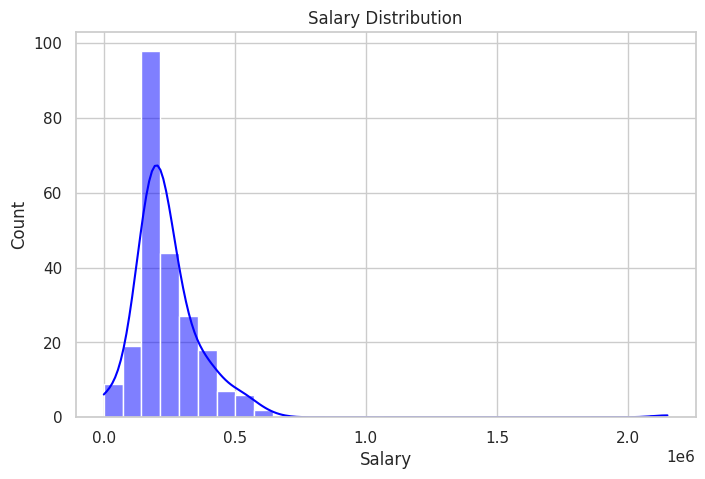

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.histplot(df['salary_avg'], bins=30, kde=True, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

Visual inspection helps identify clusters of salaries and potential outliers that may skew averages or medians.

We calculate skewness and kurtosis to understand the shape of the salary distribution:
- **Skewness** measures asymmetry. A *positive skew* indicates higher salaries are stretched out.
- **Kurtosis** measures how peaked or flat the distribution is. *High kurtosis* shows a sharp peak around the mean.

These metrics provide a deeper understanding of the salary distribution beyond basic statistics, helping identify anomalies or concentrated salary ranges.

In [52]:
print("Skewness:", df['salary_avg'].skew())
print("Kurtosis:", df['salary_avg'].kurt())

Skewness: 6.413102790225885
Kurtosis: 68.65240562749966


The correlation matrix shows how the numerical features relate to each other. It helps understand whether higher salaries are associated with larger companies (employees_min / employees_max) or observe patterns that could be useful for modeling. A strong positive correlation means that as one variable increases, the other tends to increase as well; a strong negative correlation indicates the opposite.

In [54]:
numeric_cols = ['salary_avg', 'employees_min', 'employees_max', 'seniority_level']
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

                 salary_avg  employees_min  employees_max  seniority_level
salary_avg         1.000000      -0.038238      -0.038471         0.238559
employees_min     -0.038238       1.000000       0.988154        -0.000242
employees_max     -0.038471       0.988154       1.000000         0.011455
seniority_level    0.238559      -0.000242       0.011455         1.000000


The correlation results suggest that:
- seniority slightly affects salary, but company size does not.
- minimum and maximum employee counts are almost perfectly correlated.

Overall, salary trends are **more** influenced by **seniority** than by company size in this dataset.

To determine whether salaries differ between job levels, we perform an ANOVA test. Salaries are grouped by seniority: Junior, Middle, Senior, and others.
- **F-statistic** indicates the ratio of variance between groups to variance within groups.
- **P-value** tells us if differences between seniority levels are statistically significant.

We also perform a t-test comparing Junior and Senior salaries directly.
- This test determines if the difference in average salaries between entry-level and senior roles is statistically meaningful.
- A low p-value confirms that Senior roles earn significantly more than Junior positions.

In [70]:
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
from scipy import stats
import numpy as np

print("HYPOTHESIS TESTING")
#First Hypothesis
print("H1: Do salaries differ significantly across seniority levels?")

anova_df = df[df['salary_avg'].notna() & df['seniority'].notna()].copy()
seniority_levels = ['Junior', 'Middle', 'Senior', 'Lead', 'Manager']
valid_levels = [level for level in seniority_levels if level in anova_df['seniority'].values]

groups = [anova_df[anova_df['seniority'] == level]['salary_avg'].values
          for level in valid_levels
          if len(anova_df[anova_df['seniority'] == level]) > 0]

if len(groups) >= 2:
    f_stat, p_val = f_oneway(*groups)

    print(f"\nSample sizes:")
    for level in valid_levels:
        count = len(anova_df[anova_df['seniority'] == level])
        avg_sal = anova_df[anova_df['seniority'] == level]['salary_avg'].mean()
        print(f"  {level}: {count} jobs, avg salary: {avg_sal:,.0f} AMD")

    print(f"\nF-statistic: {f_stat:.3f}")
    print(f"P-value: {p_val:.4f}")
    print(f"Significance level: α = 0.05")

    if p_val < 0.05:
        print("Result: REJECT H0 - Salaries differ significantly across seniority levels")
    else:
        print("Result: FAIL TO REJECT H0 - No significant difference")
else:
    print("Cannot perform ANOVA: insufficient groups")

# T - test - Second Hypothesis
print("\nH2: Do Junior and Senior positions have significantly different salaries?")

junior_salary = anova_df[anova_df['seniority'] == 'Junior']['salary_avg'].dropna()
senior_salary = anova_df[anova_df['seniority'] == 'Senior']['salary_avg'].dropna()

if len(junior_salary) >= 2 and len(senior_salary) >= 2:
    t_stat, t_p_val = ttest_ind(junior_salary, senior_salary)

    print(f"\nJunior positions: n={len(junior_salary)}, mean={junior_salary.mean():,.0f} AMD")
    print(f"Senior positions: n={len(senior_salary)}, mean={senior_salary.mean():,.0f} AMD")
    print(f"Difference: {senior_salary.mean() - junior_salary.mean():,.0f} AMD ({(senior_salary.mean()/junior_salary.mean()-1)*100:.1f}%)")

    print(f"\nT-statistic: {t_stat:.3f}")
    print(f"P-value: {t_p_val:.4f}")

    if t_p_val < 0.05:
        print("Result: REJECT H0 - Junior and Senior salaries differ significantly")
    else:
        print("Result: FAIL TO REJECT H0 - No significant difference")
else:
    print("Cannot perform t-test: insufficient data")

#Third Hypothesis
print("\nH3: Do salaries differ across company sizes?")

size_df = df[df['salary_avg'].notna() & df['company_type'].notna()].copy()
size_categories = ['Micro (1-15)', 'Small (16-50)', 'Medium (51-100)', 'Large (100+)']
valid_sizes = [size for size in size_categories if size in size_df['company_type'].values]

size_groups = [size_df[size_df['company_type'] == size]['salary_avg'].values
               for size in valid_sizes
               if len(size_df[size_df['company_type'] == size]) > 0]

if len(size_groups) >= 2:
    f_stat, p_val = f_oneway(*size_groups)

    print(f"\nSample sizes:")
    for size in valid_sizes:
        count = len(size_df[size_df['company_type'] == size])
        avg_sal = size_df[size_df['company_type'] == size]['salary_avg'].mean()
        print(f"  {size}: {count} jobs, avg salary: {avg_sal:,.0f} AMD")

    print(f"\nF-statistic: {f_stat:.3f}")
    print(f"P-value: {p_val:.4f}")

    if p_val < 0.05:
        print("Result: REJECT H0 - Salaries differ significantly across company sizes")
    else:
        print("Result: FAIL TO REJECT H0 - No significant difference")
else:
    print(" Cannot perform ANOVA: insufficient groups")


print("HYPOTHESIS TESTING SUMMARY")
print("\nTests performed:")
print("  H1: Salary vs Seniority (ANOVA)")
print("  H2: Junior vs Senior Salary (T-test)")
print("  H3: Salary vs Company Size (ANOVA)")
print("\nSignificance level: α = 0.05")

HYPOTHESIS TESTING
H1: Do salaries differ significantly across seniority levels?

Sample sizes:
  Junior: 82 jobs, avg salary: 215,035 AMD
  Middle: 80 jobs, avg salary: 268,588 AMD
  Senior: 43 jobs, avg salary: 307,791 AMD

F-statistic: 4.399
P-value: 0.0135
Significance level: α = 0.05
Result: REJECT H0 - Salaries differ significantly across seniority levels

H2: Do Junior and Senior positions have significantly different salaries?

Junior positions: n=82, mean=215,035 AMD
Senior positions: n=43, mean=307,791 AMD
Difference: 92,756 AMD (43.1%)

T-statistic: -4.466
P-value: 0.0000
Result: REJECT H0 - Junior and Senior salaries differ significantly

H3: Do salaries differ across company sizes?

Sample sizes:
  Micro (1-15): 102 jobs, avg salary: 251,534 AMD
  Small (16-50): 38 jobs, avg salary: 264,322 AMD
  Large (100+): 91 jobs, avg salary: 233,688 AMD

F-statistic: 0.512
P-value: 0.5997
Result: FAIL TO REJECT H0 - No significant difference
HYPOTHESIS TESTING SUMMARY

Tests performe

A significant ANOVA result confirms that job level impacts pay, which aligns with expected trends in the job market.
This focused comparison validates market expectations and quantifies the pay gap between different experience levels.

## Data Visualization

In this section, we use multiple visualizations to explore key patterns in job postings, seniority distribution, salary levels, and hiring trends across companies and industries.

In [60]:
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

**Scatter Plot – Salary vs Scaled Salary by Seniority**

The scatter plot compares the original salary values with their standardized version. The linear pattern confirms that scaling preserves relative differences between salaries. Senior and Lead roles are visibly positioned higher on the salary axis, while Junior and Intern roles cluster in lower salary ranges.

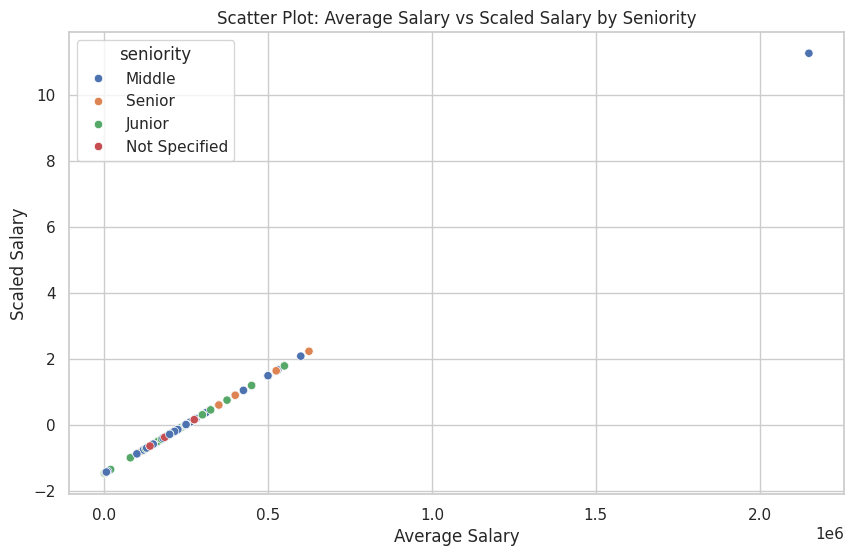

In [71]:
# Scatter Plot: salary_avg vs salary_scaled
sns.scatterplot(data=df, x='salary_avg', y='salary_scaled', hue='seniority')
plt.title("Scatter Plot: Average Salary vs Scaled Salary by Seniority")
plt.xlabel("Average Salary")
plt.ylabel("Scaled Salary")
plt.show()


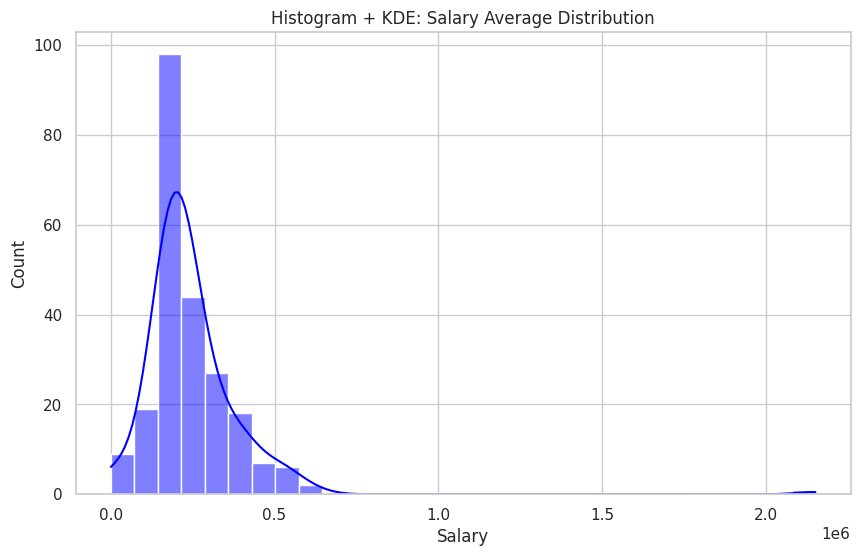

In [62]:
# Histogram + KDE: salary_avg distribution
sns.histplot(df['salary_avg'], bins=30, kde=True, color='blue')
plt.title("Histogram + KDE: Salary Average Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

**Correlation Heatmap**

The heatmap shows correlation values between numeric variables, confirming:
- Almost no strong relationship between salary levels and company size
- High correlation between employees_min and employees_max, as expected
This indicates that salary variation is likely driven by other factors such as seniority or industry.

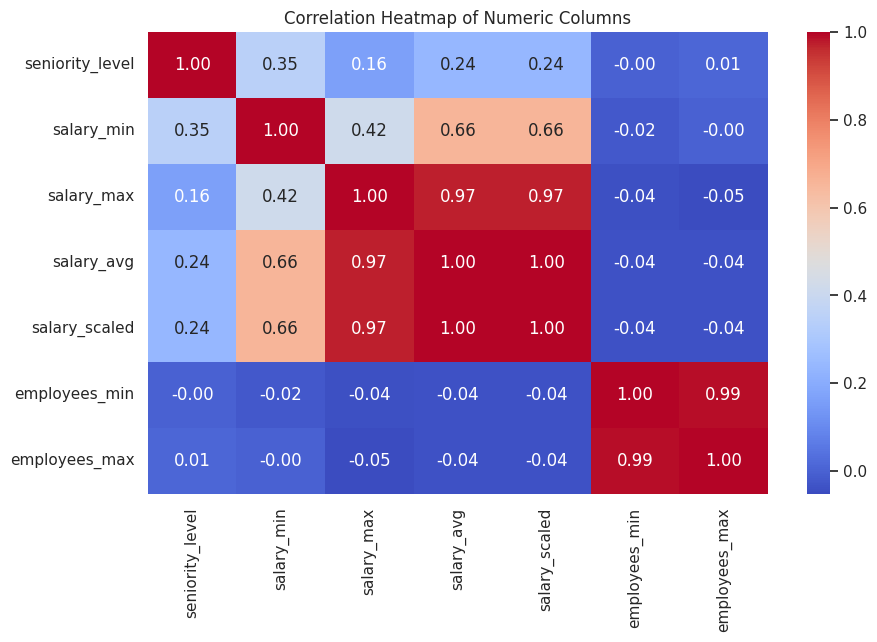

In [63]:
# Heatmap of correlations
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

**Plot Bar Jobs per Seniority**

The number of jobs demanding the Middle level of seniority is the highest according to the results.

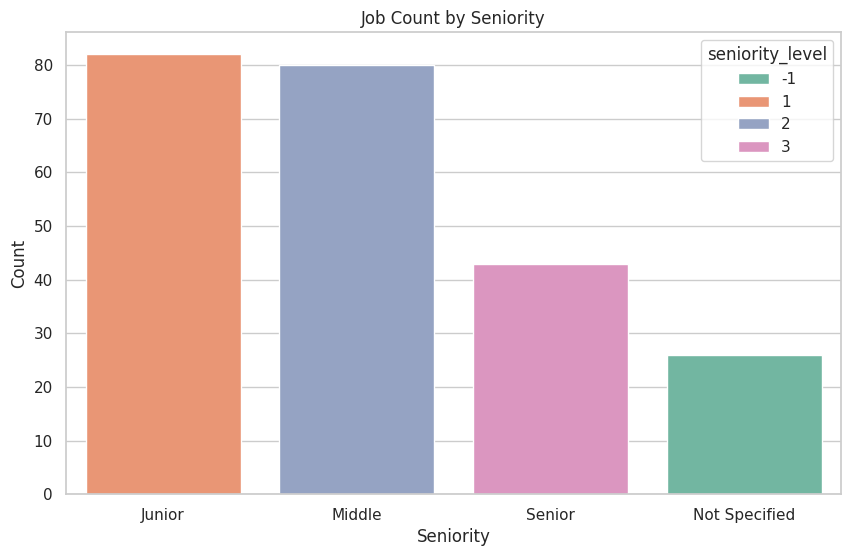

In [73]:
# Bar Plot: Count of jobs per seniority
sns.countplot(data=df, x='seniority', order=df['seniority'].value_counts().index, palette='Set2', hue='seniority_level')
plt.title("Job Count by Seniority")
plt.xlabel("Seniority")
plt.ylabel("Count")
plt.show()


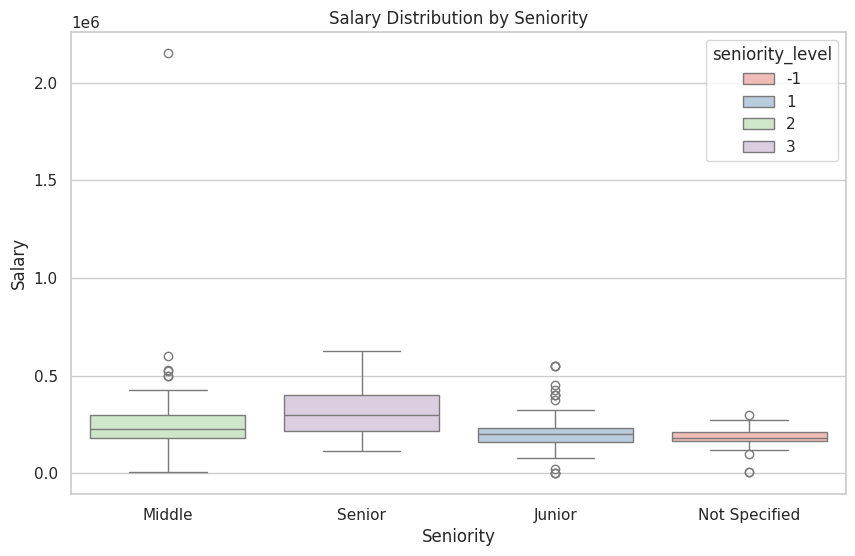

In [74]:
# Box Plot: Salary distribution by seniority
sns.boxplot(data=df, x='seniority', y='salary_avg', palette='Pastel1', hue="seniority_level")
plt.title("Salary Distribution by Seniority")
plt.xlabel("Seniority")
plt.ylabel("Salary")
plt.show()

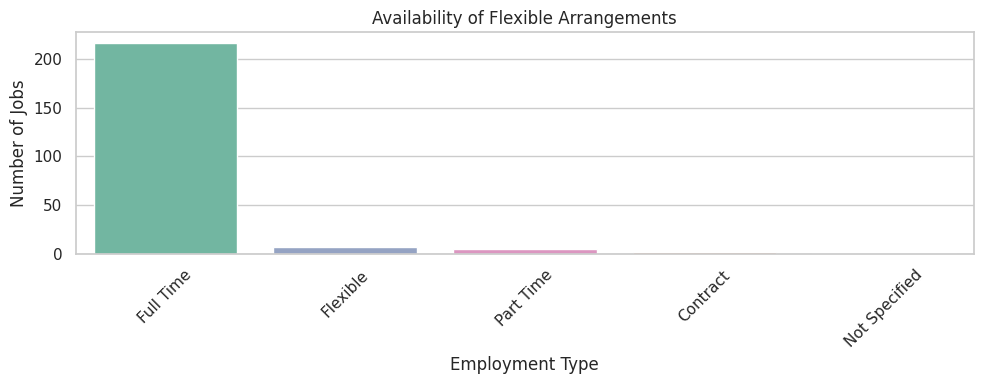

In [84]:
#Flexible arrangements
plt.figure(figsize=(10,4))
sns.countplot(
    data=df,
    x='schedule',
    order=df['schedule'].value_counts().index,
    palette='Set2',
    hue='schedule'
)
plt.title("Availability of Flexible Arrangements")
plt.xlabel("Employment Type")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)  # Rotating labels to avoid overlap
plt.tight_layout()       # Adjusting layout to prevent cutting off labels
plt.show()

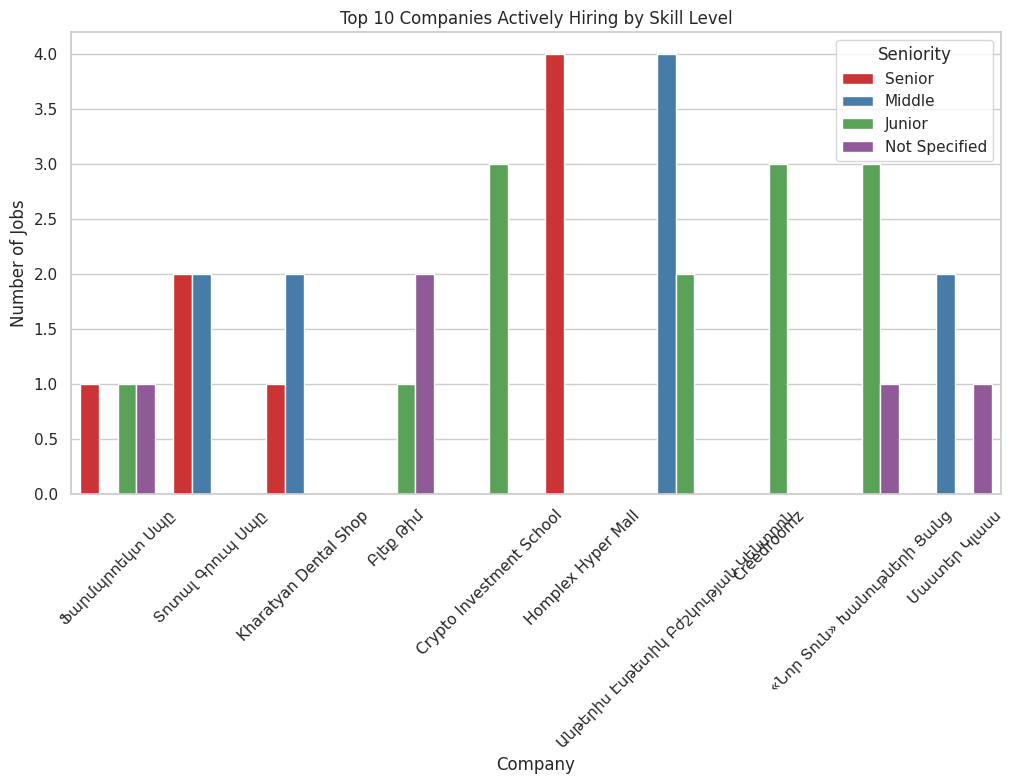

In [85]:
# Companies actively hiring by seniority
# Top 10 companies for readability
top_companies = df['company'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(
    data=df[df['company'].isin(top_companies)],
    x='company',
    hue='seniority',
    palette='Set1'
)
plt.title("Top 10 Companies Actively Hiring by Skill Level")
plt.xlabel("Company")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.legend(title="Seniority")
plt.show()

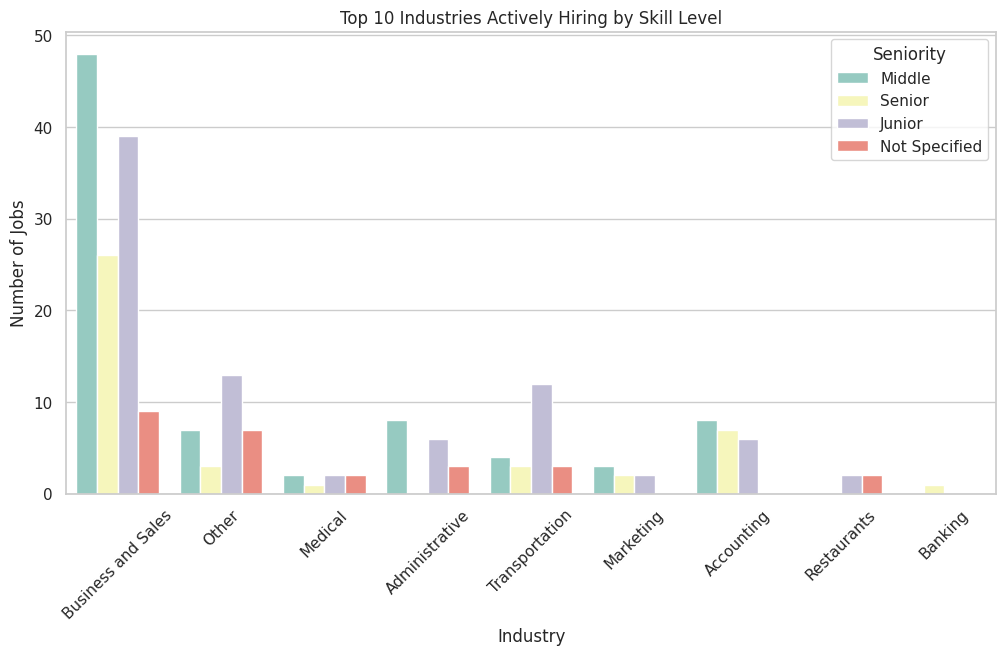

In [88]:
#Industries actively hiring by seniority
top_industries = df['industry_category'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(
    data=df[df['industry_category'].isin(top_industries)],
    x='industry_category',
    hue='seniority',
    palette='Set3'
)
plt.title("Top 10 Industries Actively Hiring by Skill Level")
plt.xlabel("Industry")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.legend(title="Seniority")
plt.show()

## Conclusion

This mini-project provides a clear and data-driven picture of the current job market in Armenia. By analyzing job postings from job.am, we identified which job categories are most in demand, how experience levels are distributed, and how much flexibility employers offer through remote or part-time options. The results show that while technical roles remain important, many opportunities also exist in fields such as customer support, sales, marketing, and administration. This confirms that the Armenian job market is more diverse than commonly assumed.

The analysis also reveals that most openings target junior professionals. This supports the idea of a continuing mismatch between what employers need and what many students or new graduates expect. Finally, the findings on part-time positions show that flexibility is present, but still not equally available across all job categories.

Overall, this project demonstrates how data can help job seekers, students, and educational institutions make more informed decisions. However, there is still room to improve the research. Future work could include scraping multiple job platforms, analyzing salary trends when available, comparing different industries, or creating an interactive dashboard. These additions would make the analysis more complete and provide even deeper insights into Armenia’s evolving job market.